# PWHL Skater Statistics - Visualizations

This notebook shows how to create different types of visualizations based on skater statistics.

## Objectives

**Show the code** used to create the different visualizations (bar plot, pie chart, etc.) and **find useful visualizations** to include in a future dashboard.

## Setup
Start by running `PWHL_season_skater_stats_to_csv.ipynb` to create the `skater_stats.csv` file.

Import all required libraries/packages.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Create a dataframe.

In [32]:
df = pd.read_csv("skater_stats.csv")

Define team names, location, codes and colors.

In [11]:
teams = {"BOS": {"name": "Fleet", "location": "Boston", "code": "BOS", "color":"#173f35"},
         "MIN": {"name": "Frost", "location": "Minnesota", "code": "MIN", "color":"#251161"},
         "MTL": {"name": "Victoire", "location": "Montréal", "code": "MTL", "color":"#832434"},
         "NY": {"name": "Sirens", "location": "New York", "code": "NY", "color":"#00bcb5"},
         "OTT": {"name": "Charge", "location": "Ottawa", "code": "OTT", "color":"#a3142f"},
         "TOR": {"name": "Sceptres", "location": "Toronto", "code": "TOR", "color":"#1869b7"}}

## Visualizations

### Distribution of goals and assists

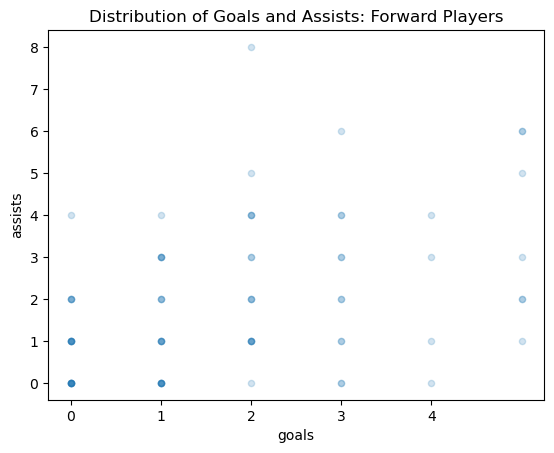

In [14]:
df[(df["position"] == "forward")].plot.scatter(x="goals", y="assists", alpha=0.2)
plt.xticks(np.arange(0, 5, 1))
plt.title("Distribution of Goals and Assists: Forward Players")
plt.show()

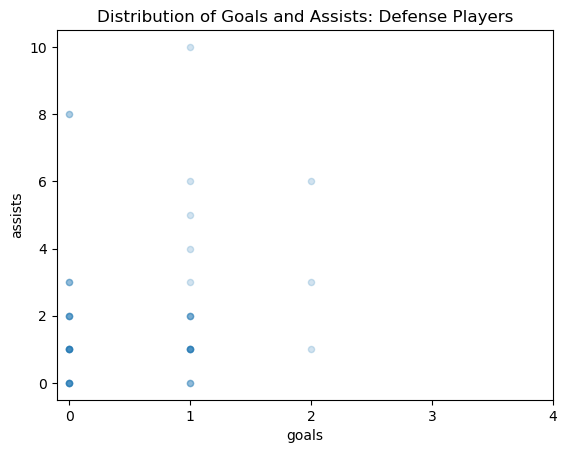

In [16]:
df[(df["position"] == "defense")].plot.scatter(x="goals", y="assists", alpha=0.2)
plt.xticks(np.arange(0, 5, 1))
plt.title("Distribution of Goals and Assists: Defense Players")
plt.show()

### Points per Rookie per Team

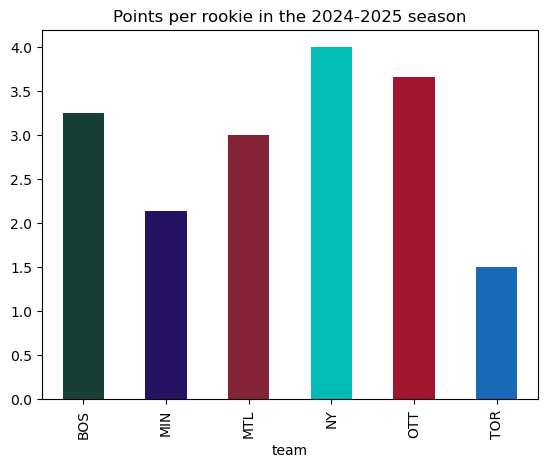

In [79]:
def points_per_rookie(df, team_code):
    rookie_points = (df[(df["status"] == "rookie") & (df["team"] == team_code)])["points"] #only keeps the rookies from the specified team
    return rookie_points.sum() / rookie_points.count() # total points divided by number of rookies

colors = []
pprookie_data = []

# creating the colors and pprookie_data lists
for team, details in teams.items():
    pprookie_data.append((team, points_per_rookie(df, team)))
    colors.append(details["color"])

# turning the pprookie_data list into a DataFrame
pprookie_df = pd.DataFrame(pprookie_data)
# naming the columns
pprookie_df.columns = ["team", "points per rookie"]
pprookie_df.plot.bar(x="team", y="points per rookie", color=colors, title="Points per rookie in the 2024-2025 season", legend=None)
plt.show()

### Relationship Between Shooting Left or Right and Points

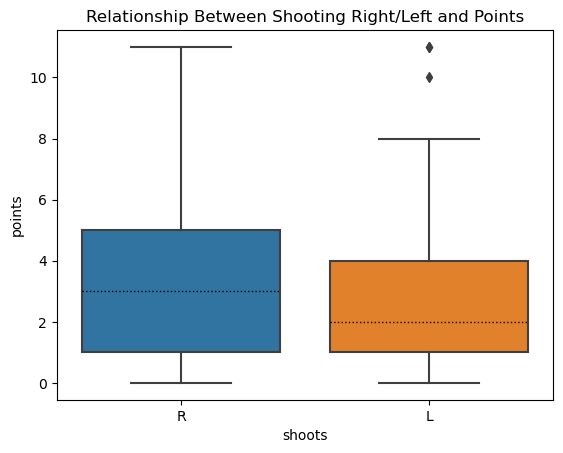

In [27]:
sns.boxplot(x = "shoots", y = "points", data=df, medianprops={'color': 'black', 'ls': ':', 'lw': 1})
plt.title("Relationship Between Shooting Right/Left and Points")
plt.show()

Note that the majority of players shoots left.

In [36]:
df["shoots"].value_counts(normalize=True) * 100

shoots
L    55.555556
R    44.444444
Name: proportion, dtype: float64

### Distribution of Top 10 Skaters Accross Teams

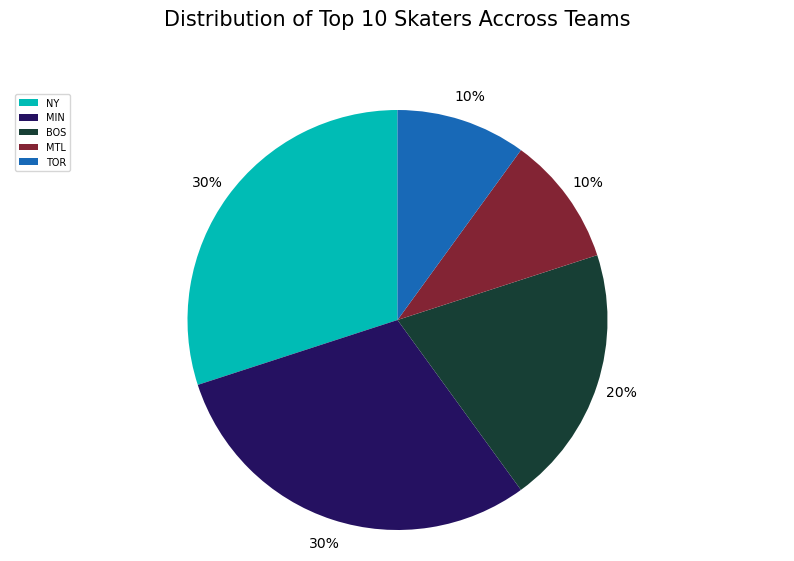

In [137]:
top10 = df.head(10)
team_df = top10["team"].value_counts().to_frame('counts')
colors_list = []
for i, row in team_df.iterrows():
    colors_list.append(teams[i]["color"])

team_df["counts"].plot(kind='pie',
             figsize=(10, 6),
             autopct='%1.f%%', 
             startangle=90,    
             shadow=False,       
             labels=None,         # turn off labels on pie chart
             ylabel='',           # remove series name on the left of the chart
             pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
             colors=colors_list)

# scale the title up by 12% to match pctdistance
plt.title('Distribution of Top 10 Skaters Accross Teams', y=1.12, fontsize = 15) 

plt.axis('equal') 

# add legend
plt.legend(labels=team_df.index, loc='upper left', fontsize=7) 

plt.show()

### Distribution of Top 50 Skaters Across Teams

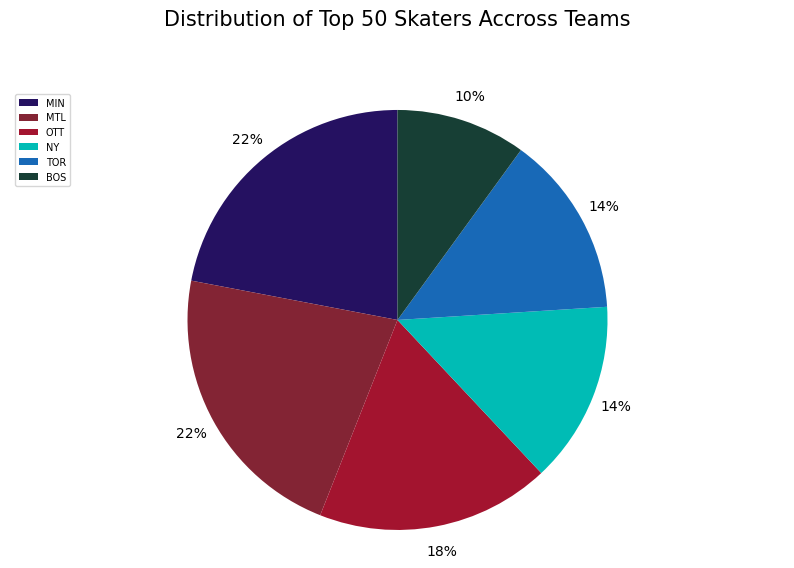

In [145]:
top50 = df.head(50)
team_df = top50["team"].value_counts().to_frame('counts')
colors_list = []
for i, row in team_df.iterrows():
    colors_list.append(teams[i]["color"])

team_df["counts"].plot(kind='pie',
             figsize=(10, 6),
             autopct='%1.f%%', 
             startangle=90,    
             shadow=False,       
             labels=None,         # turn off labels on pie chart
             ylabel='',           # remove series name on the left of the chart
             pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
             colors=colors_list)

# scale the title up by 12% to match pctdistance
plt.title('Distribution of Top 50 Skaters Accross Teams', y=1.12, fontsize = 15) 

plt.axis('equal') 

# add legend
plt.legend(labels=team_df.index, loc='upper left', fontsize=7)
plt.show()

### Age Distribution

In [170]:
# function to return the age, in years, rounded down
def calculate_age(birthdate_str):
    birthdate = pd.to_datetime(birthdate_str)
    today = pd.to_datetime('today')
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age
# create a row for the age in years
df["age"] = df.apply(lambda row: calculate_age(row["date of birth"]), axis = 1)

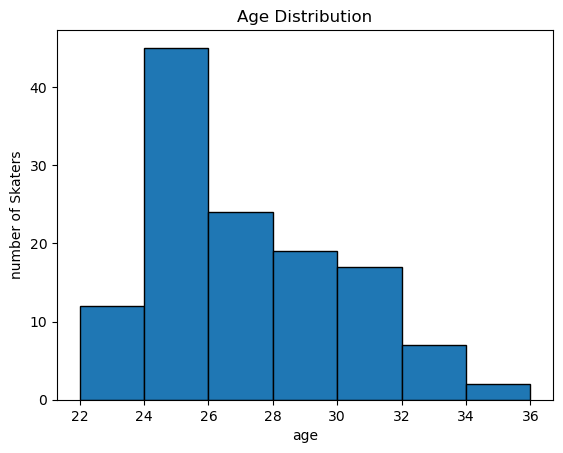

In [180]:
plt.hist(df["age"], bins=7, edgecolor='black')

# Add titles and labels
plt.title('Age Distribution')
plt.xlabel('age')
plt.ylabel('number of Skaters')

# Show plot
plt.show()

### TODO

- See if the proportion of right and left handed players is the same for each team
- See which proportion of the goals are scored by defense players, globally and for each team
- Average in shootouts for each team (make sure the players participated in shootouts)
- Relationship between points and age
- Penalty minutes total for each team (pie chart?)

In [139]:
df.describe()

,rank,games_played,goals,assists,points,plus/minus,penalty minutes,power play goals,power play assists,short handed goals,...,insurance goals,overtime goals,unassisted goals,empty net,shooting percentage,shootout goals,shots in shootouts,shootoutwinning goals,shootout percentage,jersey number
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,...,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,64.341270,9.484127,1.277778,1.928571,3.206349,-0.023810,3.166667,0.293651,0.539683,0.031746,...,0.111111,0.047619,0.158730,0.055556,8.205556,0.119048,0.317460,0.031746,7.011111,25.761905
std,37.928388,2.753134,1.406493,1.972526,2.728567,2.795609,3.819424,0.552340,1.032673,0.176023,...,0.362706,0.213809,0.388076,0.262467,11.001398,0.411964,0.733766,0.176023,23.698804,22.864620
min,1.000000,1.000000,0.000000,0.000000,0.000000,-7.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,32.250000,9.000000,0.000000,1.000000,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.250000
50%,63.500000,10.000000,1.000000,1.000000,2.500000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.700000,0.000000,0.000000,0.000000,0.000000,19.000000
75%,94.750000,11.000000,2.000000,3.000000,5.000000,2.000000,4.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,12.500000,0.000000,0.000000,0.000000,0.000000,28.000000
max,140.000000,13.000000,5.000000,10.000000,11.000000,7.000000,23.000000,2.000000,5.000000,1.000000,...,2.000000,1.000000,2.000000,2.000000,100.000000,2.000000,4.000000,1.000000,100.000000,94.000000
